# Introduction

This notebook serves as a graphical exploratory data analysis of the projecet on crime statistics. The original raw data is available from http://www.houstontx.gov/police/cs/index-2.htm. A detailed introduction on the data cleaning process can be found in [previous report](https://github.com/phyhouhou/SpringboardProjects/blob/master/FirstCapstoneProject/data_cleaning_capstone_project.ipynb).

In [30]:
#Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from pylab import *
rcParams['font.size'] = 18.0
rcParams['axes.titlesize'] = 20.0
rcParams['xtick.labelsize'] = 20.0
rcParams['legend.fontsize'] = 18.0

rcParams["figure.figsize"] = (15,9)



# Load data
Raw data can be downloaded in the [HPD website](http://www.houstontx.gov/police/cs/index-2.htm). I've downloaded the data and made it clean. Read the data cleaning [report](https://github.com/phyhouhou/SpringboardProjects/blob/master/FirstCapstoneProject/data_cleaning_capstone_project.ipynb) for details. The cleaned data is also uploaded [online](https://file.io/eLoGQ3).

In [2]:
import pandas as pd
crimes=pd.read_csv('crimes_clean.csv', parse_dates=['Date'],index_col='Date')
crimes.head()

,Hour,OffenseType,Beat,Premise,BlockRange,StreetName,Type,Suffix,OffenseNum
Date,,,,,,,,,
2010-01-01,2,Theft,7C20,13,3100-3199,COLLINGSWORTH,-,-,1
2010-01-01,2,Robbery,20G70,18,1900-1999,WESTMEAD,DR,-,1
2010-01-01,9,Robbery,4F30,13,1700-1799,BRITTMOORE,RD,-,1
2010-01-01,10,Robbery,20G10,18,2900-2999,WEST SAM HOUSTON,PKWY,S,1
2010-01-01,14,Robbery,20G80,8,1000-1099,WEST OAKS MALL,-,-,1


## An overview of the data

In [3]:
crimes.sample(5)

,Hour,OffenseType,Beat,Premise,BlockRange,StreetName,Type,Suffix,OffenseNum
Date,,,,,,,,,
2017-03-28,23,Theft,3B10,18,4200-4299,LOCKFIELD,ST,-,1
2010-07-08,17,Theft,1A20,18,2200-2299,DALLAS,ST,W,1
2015-12-26,2,Theft,9C20,25,1500-1599,MCCARTY,-,-,1
2014-10-26,8,Robbery,14D30,13,6400-6499,MARTIN LUTHER KING,BLVD,-,1
2010-12-09,20,Theft,13D10,18,100-199,WINKLER,DR,-,1


In [18]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 999521 entries, 2010-01-01 to 2017-12-31
Data columns (total 9 columns):
Hour           999521 non-null int64
OffenseType    999521 non-null object
Beat           999521 non-null object
Premise        999521 non-null int64
BlockRange     999521 non-null object
StreetName     999521 non-null object
Type           999521 non-null object
Suffix         999521 non-null object
OffenseNum     999521 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [56]:
crimes.isnull().sum()

Hour           0
OffenseType    0
Beat           0
Premise        0
BlockRange     0
StreetName     0
Type           0
Suffix         0
OffenseNum     0
dtype: int64

The time-indexed crime data ranges from 2010-01-01 to 2017-12-31 and contains 9 colums with 999521 entries without missing values. But be cautious that we do have 'UNK'.

In [4]:
#Proportions of 'UNK' in the crimes data.
{col:crimes[col].value_counts(normalize=True)['UNK'] for col in ['Beat', 'BlockRange','StreetName']}

{'Beat': 0.0031865263461197915,
 'BlockRange': 0.005548657807089596,
 'StreetName': 7.0033546068566845e-06}

In order to have an initial perception of the distributions of crimes with respect to time and location, we keep the 'Hour' and 'Premise' as integers and encode the 'Beat' column.

In [5]:
c=crimes.copy()
c['Beat_cod'] = crimes['Beat'].astype('category').cat.codes
c.head()

,Hour,OffenseType,Beat,Premise,BlockRange,StreetName,Type,Suffix,OffenseNum,Beat_cod
Date,,,,,,,,,,
2010-01-01,2,Theft,7C20,13,3100-3199,COLLINGSWORTH,-,-,1,108
2010-01-01,2,Robbery,20G70,18,1900-1999,WESTMEAD,DR,-,1,63
2010-01-01,9,Robbery,4F30,13,1700-1799,BRITTMOORE,RD,-,1,96
2010-01-01,10,Robbery,20G10,18,2900-2999,WEST SAM HOUSTON,PKWY,S,1,57
2010-01-01,14,Robbery,20G80,8,1000-1099,WEST OAKS MALL,-,-,1,64


While the summary statistics of the categorical data doesn't make much sense in max, min, mean... but its histogram give hints on crime patterns concerning time and location as shown below.

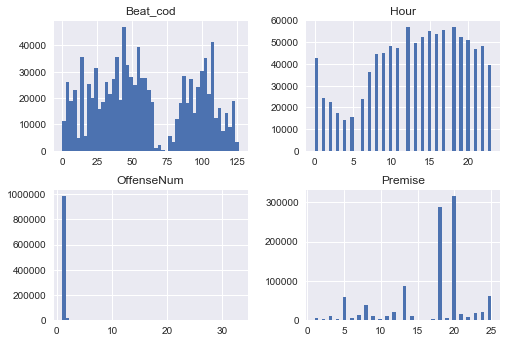

In [4]:
c.hist(bins=50);

The 'Beat_cod' fig shows that beat coded between 70-80 has very low frequency hence lower crime rate. In contrast, beats between 40-50 have a much larger frequency indicating a much higher crime rate. The 'Hour' fig suggests that less crimes occur between 1-6 am than the interval between 12-20. Regarding the 'Premise', it is obvious that Premise encoded as 18 and 20 are susceptible to crimes. The 'OffenseNum' has some ambiguity. Does it mean the number of criminals in a crime or the number of victims in a crime? I couldn't find a clear descrition on this feature. Thus I assume that it gives extra information regarding a crime that happened hence ignore the ambiguity. This feature is mostly 1. 

In order to find some summary information for the categorical variables, we convert Premise', 'Hour', and 'Beat_cod' to strings below. 

In [6]:
c['Premise']=c['Premise'].astype('str')
c['Hour']=c['Hour'].astype('str')
c['Beat_cod']=c['Beat_cod'].astype('str')

In [55]:
c.select_dtypes(include=['object']).describe()

,Hour,OffenseType,Beat,Premise,BlockRange,StreetName,Type,Suffix,Beat_cod
count,999521,999521,999521,999521,999521,999521,999521,999521,999521
unique,24,7,127,25,347,27780,35,5,127
top,18,Theft,19G10,20,100-199,WESTHEIMER,-,-,47
freq,56952,549488,21299,316318,13738,27214,239896,861934,21299


The table above reveals that there are 7 unique types of crimes, 24 unique hours, 127 Beats, 25 Premises. The 'top' row indicates that 'theft' is the dominant crime type. Crimes peaks at 18 during a day. Among 127 beats, '19G10' is the beat with the most crimes. Within 25 premises, '20' representing apartment/residence/home ranks top. However these numbers are independently counted and couldn't tell us the whole story. We will explore the data more from the time point of view and geographical aspects in next section.

# Visualize Data

## Time Series Analysis for the Crime Data

### Reshape the data frame
In order to visualize the time series plot of the crimes, we need to reshape the crime data through grouping it by 'Date' and 'OffenseType'.

In [7]:
#Create a table to record the number of crimes by offense types and date
#crime_date_df=crimes.groupby(['Date','OffenseType']).size().unstack().fillna(0)
date_crime=crimes.groupby(['Date','OffenseType']).size().unstack()#.fillna(0)


#reorder columns in a desceding order of its proportion in total number of crimes
date_crime=date_crime[list(crimes['OffenseType'].value_counts().index)]
date_crime.head()


OffenseType,Theft,Burglary,AutoTheft,AggravatedAssault,Robbery,Rape,Murder
Date,,,,,,,
2010-01-01,215.0,77.0,21.0,53.0,31.0,13.0,1.0
2010-01-02,200.0,67.0,28.0,15.0,32.0,2.0,NaN
2010-01-03,179.0,52.0,34.0,29.0,38.0,NaN,NaN
2010-01-04,211.0,94.0,29.0,25.0,24.0,1.0,NaN
2010-01-05,183.0,88.0,20.0,21.0,19.0,3.0,2.0


In [16]:
date_crime.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2922 entries, 2010-01-01 to 2017-12-31
Data columns (total 7 columns):
Theft                2922 non-null float64
Burglary             2921 non-null float64
AutoTheft            2922 non-null float64
AggravatedAssault    2920 non-null float64
Robbery              2916 non-null float64
Rape                 2576 non-null float64
Murder               1363 non-null float64
dtypes: float64(7)
memory usage: 182.6 KB


In [18]:
date_crime.isnull().sum()

OffenseType
Theft                   0
Burglary                1
AutoTheft               0
AggravatedAssault       2
Robbery                 6
Rape                  346
Murder               1559
dtype: int64

This date_crime data frame records the number of daily crimes during 2010-01-01 to 2017-12-31 corresponding to different types of crime. There is no missing date in the sense that during the 2922 days, all records are kept. However, for some particular types of violent crime, it doesn't happen as often as others fortunately. Thus if there is some day that a type of crime is missing, we fill that missing data with 0. 

In [4]:
date_crime=date_crime.fillna(0)
#date_crime.isnull().sum()
date_crime.head()

OffenseType,Theft,Burglary,AutoTheft,AggravatedAssault,Robbery,Rape,Murder
Date,,,,,,,
2010-01-01,215.0,77.0,21.0,53.0,31.0,13.0,1.0
2010-01-02,200.0,67.0,28.0,15.0,32.0,2.0,0.0
2010-01-03,179.0,52.0,34.0,29.0,38.0,0.0,0.0
2010-01-04,211.0,94.0,29.0,25.0,24.0,1.0,0.0
2010-01-05,183.0,88.0,20.0,21.0,19.0,3.0,2.0


### A View of Offense Types

In [5]:
date_crime.describe()

OffenseType,Theft,Burglary,AutoTheft,AggravatedAssault,Robbery,Rape,Murder
count,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000
mean,188.052019,62.024641,34.427105,28.335387,26.231006,2.345996,0.651266
std,28.302494,18.321656,7.503530,8.245035,7.067801,1.746831,0.826148
min,10.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,172.000000,48.000000,29.000000,22.250000,22.000000,1.000000,0.000000
50%,190.000000,60.000000,34.000000,28.000000,26.000000,2.000000,0.000000
75%,205.000000,74.000000,39.000000,33.000000,31.000000,3.000000,1.000000
max,284.000000,151.000000,68.000000,73.000000,64.000000,13.000000,5.000000


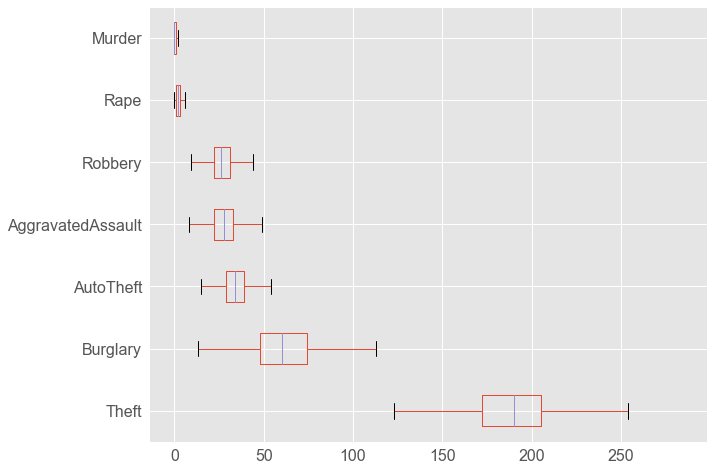

In [8]:
plt.style.use('ggplot')
date_crime.boxplot(fontsize=16,vert=False,figsize=(10,8));

It looks like that the data are pretty different from another. Apparently, 'Theft' is the most frequent crime and has the highest variability. Indeed property crimes like 'Theft', 'Burglary' and 'AutoTheft' happens more frequently than violent crimes like 'Murder', 'Rape', 'Robbery', 'AggravatedAssault'. 'Let's dig into it and explore more.

### What does time series of crimes look like?

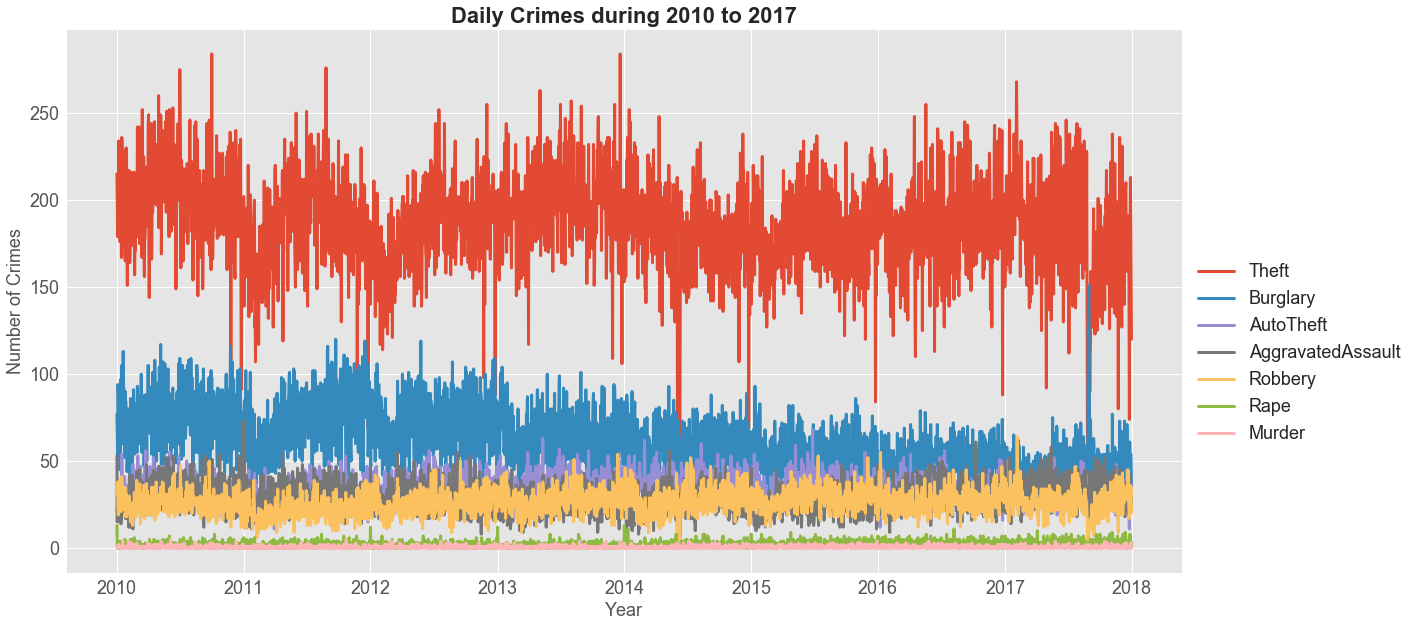

In [9]:
plt.style.use('ggplot')
ax=date_crime.plot(figsize=(20,10),fontsize=18,linewidth=3,linestyle='-')

ax.set_xlabel('Year',fontsize=18)
ax.set_ylabel('Number of Crimes',fontsize=18)
ax.set_title('Daily Crimes during 2010 to 2017',fontsize=22,fontweight='bold')

ax.legend(bbox_to_anchor=(1.0, 0.6), fontsize=18);

The above figure illustrates that 'Theft' is the dominat crime and it seems to exhibit some pattern. 'Burglary' looks like decreasing from 2010 to 2017. We need to zoom the figure to find more information.

### Visualize the Time Series of Crime: Facet Plot

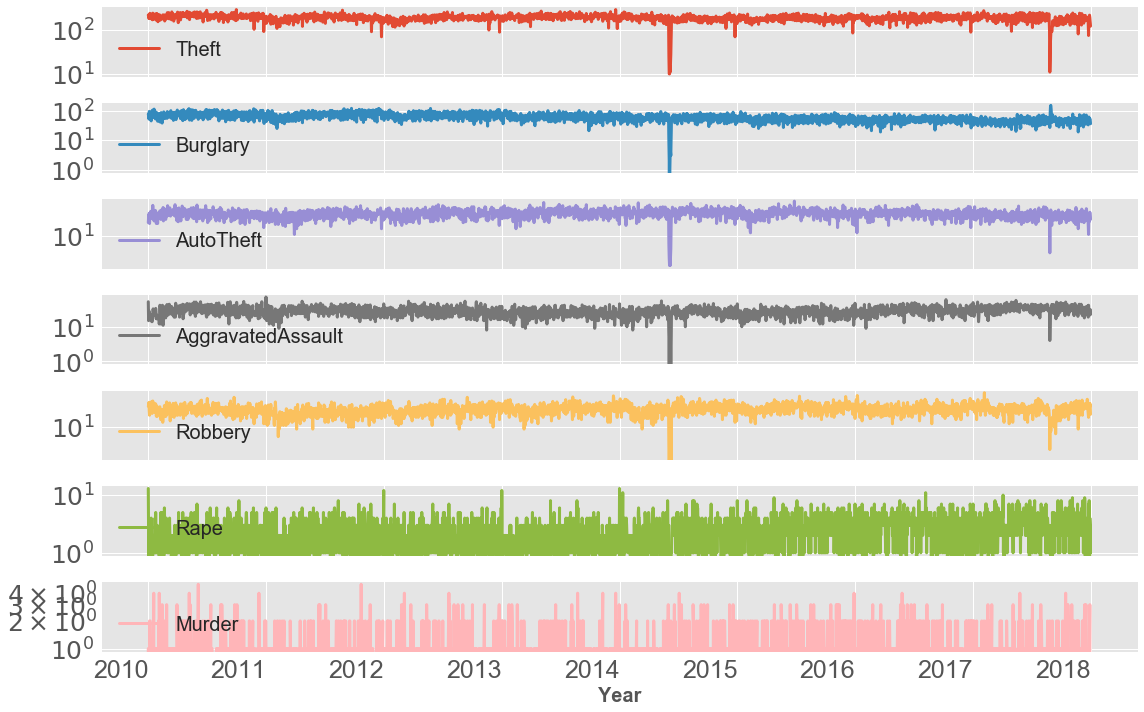

In [10]:
ax=date_crime.plot(subplots=True,figsize=(16,10), linewidth=3, fontsize=25,logy=True);
[ax[i].legend(fontsize=20,loc='lower left') for i in range(len(date_crime.columns))];
date_crime.plot(subplots=True,legend=False,ax=ax)
plt.xlabel('Year',fontsize=20,fontweight='bold')
plt.tight_layout()
plt.savefig('figs/timeseries.png');

This figure illustrates an interesting point: two drips are so eye-catching. During June of 2014, crimes have a drastic decrease. During August/September of 2017, crimes like 'Theft', 'AutoTheft', 'AggravatedAssault','Robbery' had a significant drop while 'Burglary' offenses increased siginificantly. It's really interesting to find out why. Could it be due to missing data? We have checked in previous section that there was no date that had missing record. There should be some reason behind. It's always meaningful to find out what caused low crime rate. I moved here after 2014, I don't know what big events happened during 2014 but I do know there was a devastating hurricane 'Harvey' on August 23 in 2017. It looks like that period just matched the low crime period in 2017.

### A date table to record the max, min number of different  types of crimes 

In [63]:
max_crime_date=date_crime.idxmax()
min_crime_date=date_crime.idxmin()
max_min_date=pd.concat([max_crime_date,min_crime_date],axis=1)#.droplevel()
max_min_date.columns=['max_date','min_date']
max_min_date.T

OffenseType,Theft,Burglary,AutoTheft,AggravatedAssault,Robbery,Rape,Murder
max_date,2010-10-01,2017-08-30,2015-06-27,2011-01-01,2017-02-05,2010-01-01,2010-06-05
min_date,2014-06-04,2014-06-05,2014-06-05,2014-06-04,2014-06-04,2010-01-03,2010-01-02


This table further confirms the 'weird' period during June of 2014. 

### Zoom in June 2014

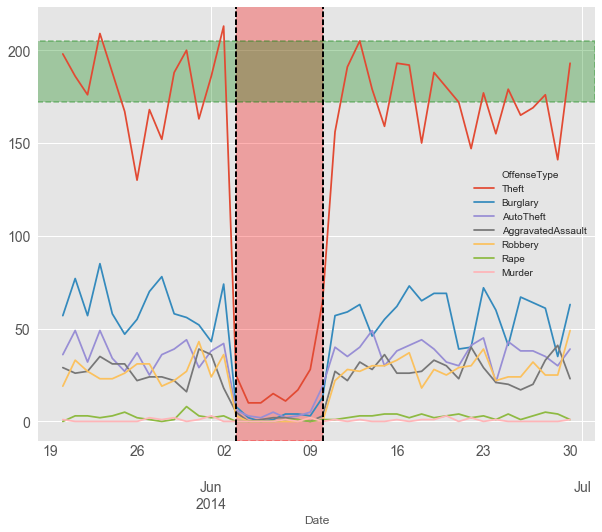

In [11]:
ax=date_crime['2014-05-20':'2014-06-30'].plot(fontsize=14,legend=True,figsize=(10,8))
ax.axvline('2014-06-03',color='black',linestyle='--',linewidth=2)
ax.axvline('2014-06-10',color='black',linestyle='--',linewidth=2)
ax.axvspan('2014-06-03','2014-06-10',color='red',linestyle='--',linewidth=2,alpha=0.3)
ax.axhspan(date_crime['Theft'].quantile(0.25),date_crime['Theft'].quantile(0.75),color='green',linestyle='--',linewidth=2,alpha=0.3 );

It remains a puzzle to figure out what caused the big drip during June 2-June 9 2014. 

### Zoom in August 2017

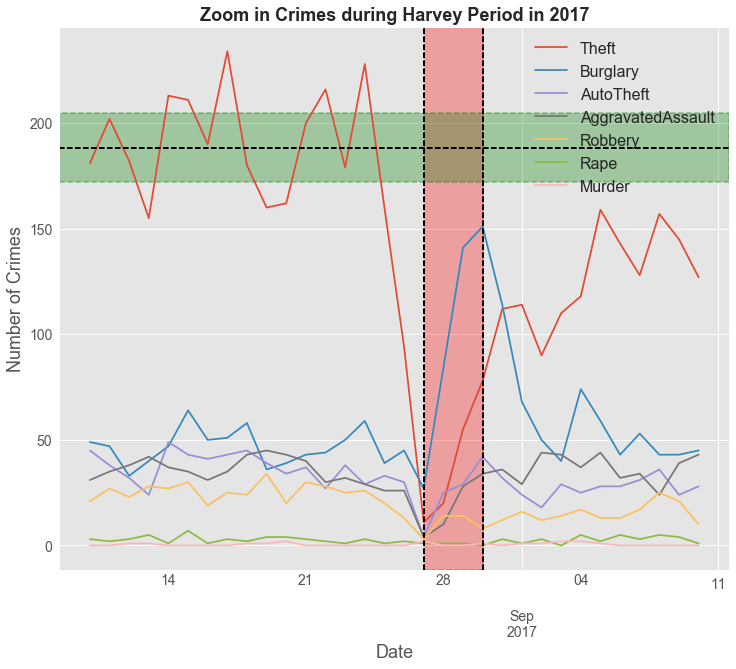

In [12]:
ax=date_crime['2017-08-10':'2017-09-10'].plot(fontsize=14,legend=True,figsize=(12,10))#color='blue',
ax.axvline('2017-08-27',color='black',linestyle='--',linewidth=2)
ax.axvline('2017-08-30',color='black',linestyle='--',linewidth=2)
ax.axhline(round(date_crime['Theft'].mean(),0),color='black',linestyle='--',linewidth=2 )
ax.axvspan('2017-08-27','2017-08-30',color='red',linestyle='--',linewidth=2,alpha=0.3)
ax.axhspan(date_crime['Theft'].quantile(0.25),date_crime['Theft'].quantile(0.75),color='green',linestyle='--',linewidth=2,alpha=0.3 );
ax.set_title('Zoom in Crimes during Harvey Period in 2017',fontsize=18,fontweight='bold')
plt.legend(loc='best',fontsize=16)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Number of Crimes',fontsize=18)
plt.savefig('figs/zoom2017.png');

As is shown in the figure, due to the severe weather, crimes dropped overall in the hurricane. However, 'Burglary' quickly increased followed by 'Theft', 'AutoTheft' 'Robbery' and 'Assault'. Correlations of crimes with weather might be better displayed to explore crime changes in flooded area. This is intersting to know to better protect properties and personal safety and more efficiently deployed for the police department.

### Annual Average of Crimes: How has the crime changed during years between 2010 and 2017?

In [11]:
#yearly_crime=date_crime.resample('AS',label='left').mean().round(0).to_period('Y')
yearly_crime=date_crime.resample('AS',label='left').sum().round(0).to_period('Y')#.sum(axis=1)
yearly_crime

OffenseType,Theft,Burglary,AutoTheft,AggravatedAssault,Robbery,Rape,Murder
Date,,,,,,,
2010,73745.0,27842.0,12406.0,10925.0,9462.0,708.0,255.0
2011,67652.0,27210.0,11839.0,10621.0,8007.0,745.0,193.0
2012,67247.0,26420.0,12643.0,10193.0,9357.0,655.0,209.0
2013,72756.0,23582.0,13091.0,9258.0,9853.0,619.0,205.0
2014,66093.0,21011.0,13429.0,9465.0,9987.0,813.0,228.0
2015,66259.0,19810.0,13108.0,9231.0,10279.0,972.0,283.0
2016,68998.0,18455.0,12694.0,10838.0,9949.0,1120.0,284.0
2017,66738.0,16906.0,11386.0,12265.0,9753.0,1223.0,246.0


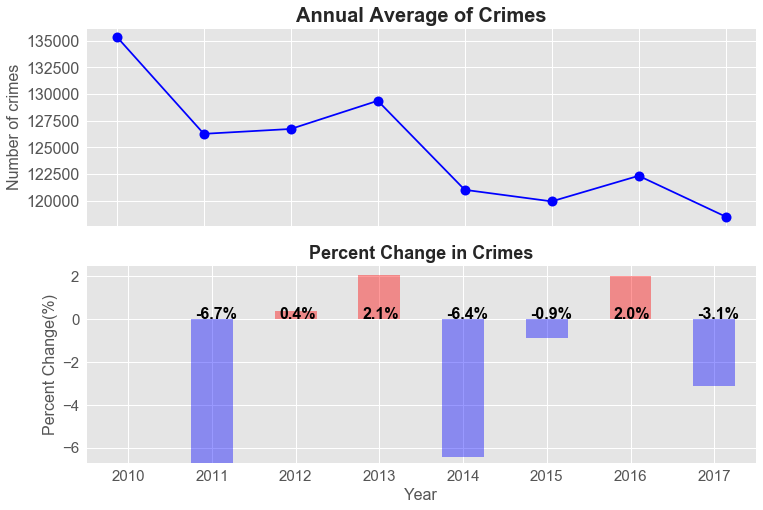

In [12]:
plt.subplot(211)
ax1=yearly_crime.sum(axis=1).plot(marker='o',linestyle='-',markersize=10,figsize=(12,6),fontsize=16,color='blue')
plt.xlabel('Year',fontsize=16)
plt.ylabel('Number of crimes',fontsize=16)
plt.title('Annual Average of Crimes',fontweight='bold',fontsize=20);


plt.subplot(212)
pct_yearly=yearly_crime.sum(axis=1).pct_change()*100
c=['red'if p>0 else 'blue' for p in pct_yearly]
ax2=pct_yearly.plot(kind='bar',fontsize=15,figsize=(12,8),color=c,alpha=0.4,legend=False,rot=0,sharex=True)
for idx, val in enumerate(pct_yearly.dropna()):
    ax2.text( idx+0.8,0, str(round(val,1))+'%', color='black', fontweight='bold',fontsize=16)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Percent Change(%)',fontsize=16)
plt.title('Percent Change in Crimes',fontsize=18,fontweight='bold');
#plt.savefig('figs/AnnualCrimes.png')

The annual average of crimes figure shows that the overall crimes have a decreasing trend. But is it true to every category of crimes?

The percentage change charts illustrates crime changes in percentage compared to previous year. It indicates that overall crime rate in 2017 is lower than that in 2016. However this plot doesn't necessarily imply that all types of crimes get reduced. 

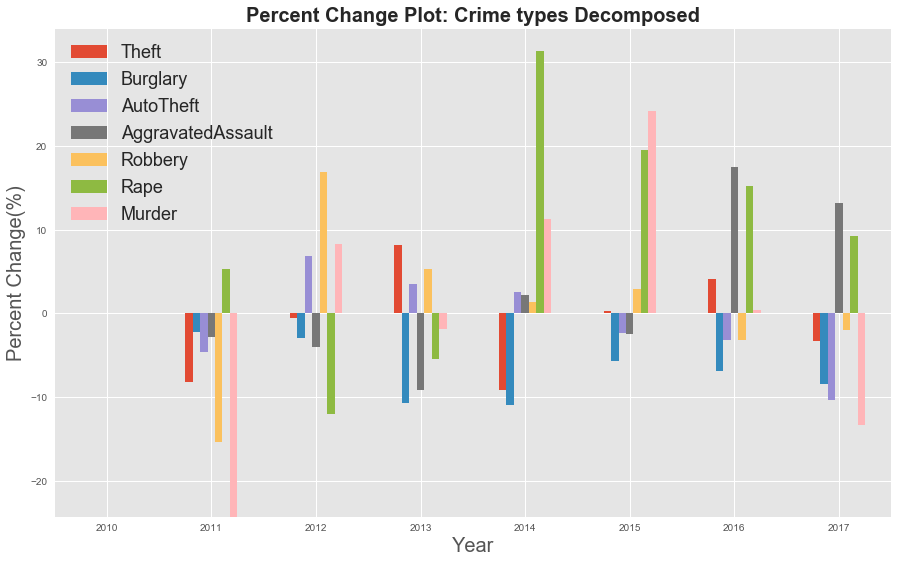

In [13]:
plt.style.use('ggplot')
ax=(yearly_crime.pct_change()*100).plot(kind='bar',rot=0,figsize=(15,9))
plt.legend(loc='upper left',fontsize=18)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Percent Change(%)',fontsize=20)
plt.title('Percent Change Plot: Crime types Decomposed',fontweight='bold',fontsize=20);


This figure above compares the situation of differnt crimes in consecutive years. It's worthwhile to notice that the drop in total number of crimes shouldn't be emphasized too much as violent crimes like 'AggravatedAssault' tend to increase. 

### Which type of crimes occurs most often?

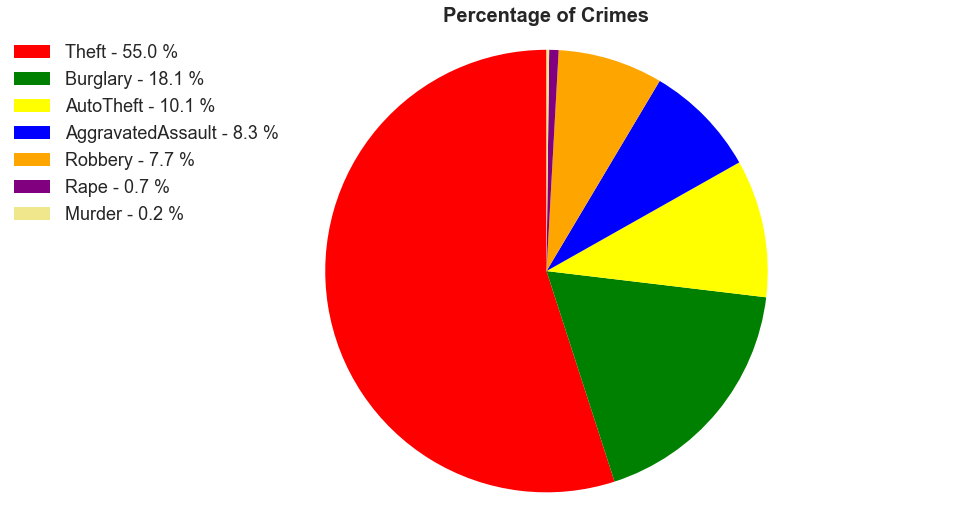

In [18]:
rcParams['font.size'] = 28.0
def pieplot(s,colors, title,fn):
    x=s.index
    y=np.array(s.values)
    percent=100.*y/y.sum()
    
    patches, texts = plt.pie(y, startangle=90, radius=1.2,colors=colors)
    labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(x, percent)]
    
    #sort_legend = True
    #if sort_legend:
    #    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),key=lambda x: x[2],reverse=True))


    plt.legend(patches, labels, loc='best', bbox_to_anchor=(0.2, 1.))
    plt.title(title,fontweight="bold")
    plt.axis('equal')
#    plt.savefig('figs/'+str(fn)+'.png', bbox_inches='tight',dpi=300);

colors=['red','green','yellow','blue','orange','purple','khaki']

type_count=yearly_crime.sum(axis=0)


pieplot( type_count,colors,'Percentage of Crimes','piechartperc')

The pie chart shows that 'Theft' is the dominant crimes in the data while 'Rape','Murder' only takes a rather small portion.

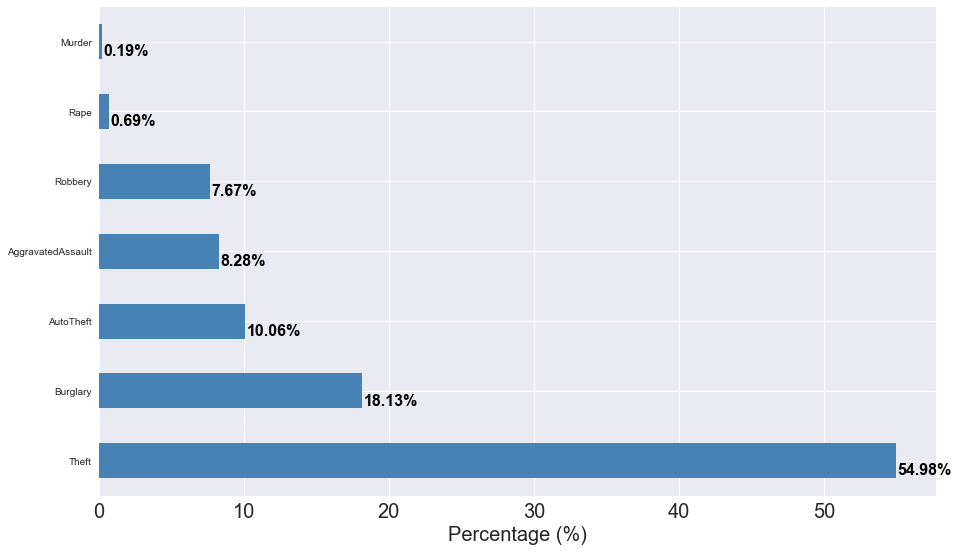

In [19]:
type_c=round(crimes.OffenseType.value_counts(normalize=True)*100,2)
ax=type_c.plot(kind='barh',rot=0,color='steelblue')
for i, v in enumerate(type_c):
    ax.text( v + 0.1,i-0.2, str(v)+'%', color='black', fontweight='bold',fontsize=16)

plt.xlabel('Percentage (%)',fontsize=20)

### Identifying Trends by Decomposing the Crime Data
We apply the moving average model to smooth out short-term fluctuations and highlight long-term trends. As illustrated in the figure below, the 'Theft' seems to display some periodic pattern while 'Buglary' exhibit a decresing trend and 'AggravatedAssault' tend to increase. 

In [16]:
monthly_crime=date_crime.resample('MS',label='left').mean().round(0)
#monthly_crime.head()

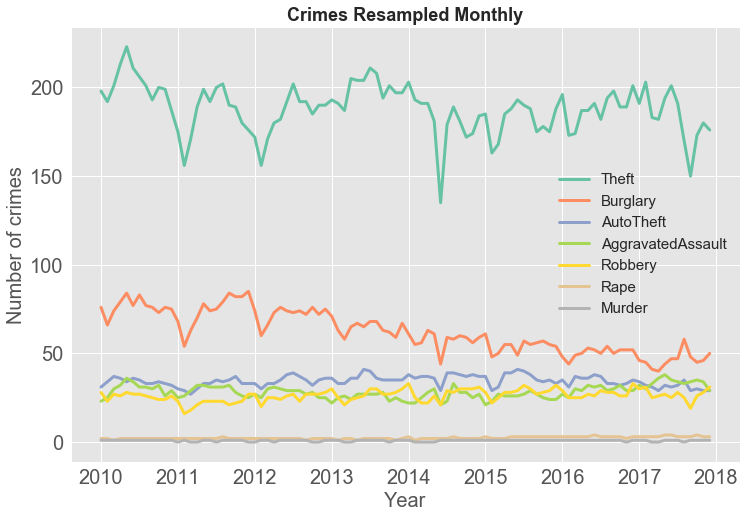

In [17]:
monthly_crime.plot(figsize=(12,8), linewidth=3, fontsize=20,colormap='Set2',logy=False)
plt.legend(loc='best',fontsize=15)
plt.ylabel('Number of crimes',size=20)
plt.xlabel('Year', fontsize=20)
plt.title('Crimes Resampled Monthly',fontsize=18,fontweight='bold');

The trend is more clear if we visualize the 12-month rolling mean of the crimes as illustrated below. 'Burgalry' is decreasing but 'AggravatedAssault' and 'Rape' is increasing. 

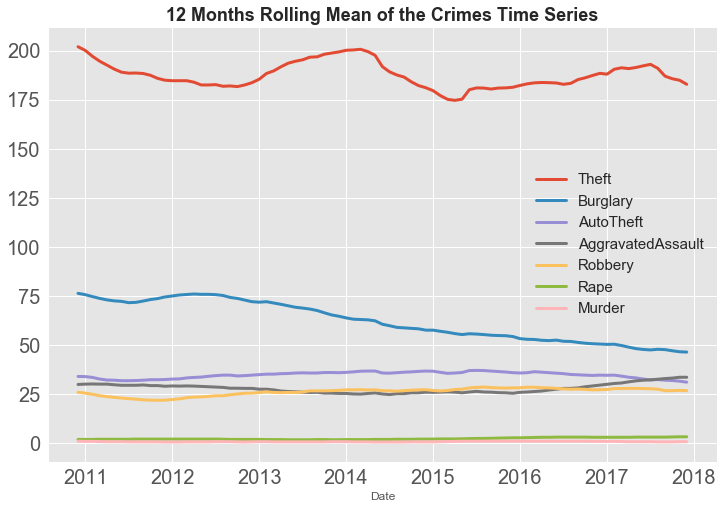

In [18]:
monthly_crime.rolling(window=12).mean().plot(figsize=(12,8), linewidth=3, fontsize=20,logy=False)
plt.title('12 Months Rolling Mean of the Crimes Time Series',fontsize=18,fontweight='bold')
plt.legend(fontsize=15);

/Users/phyhouhou/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


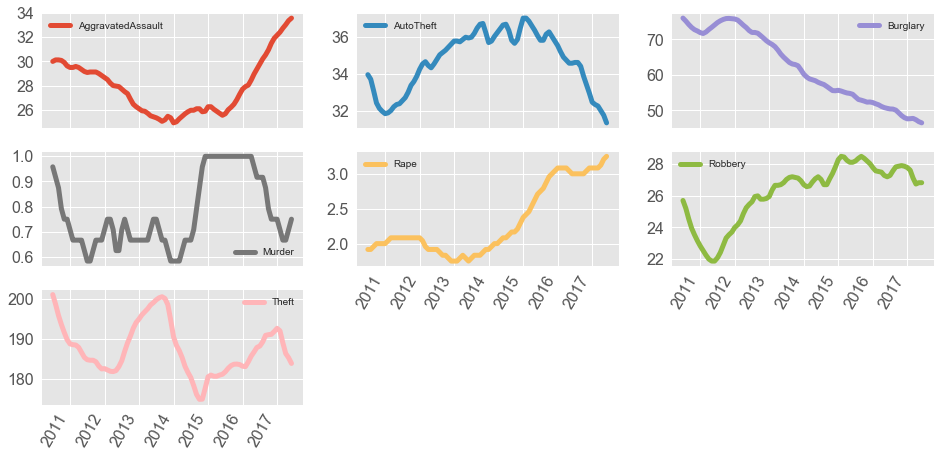

In [19]:
import statsmodels.api as sm
my_dict={}
ts_names=monthly_crime.columns
for ts in ts_names:
    ts_decomposition=sm.tsa.seasonal_decompose(monthly_crime[ts])
    my_dict[ts]=ts_decomposition

# extract decomposition components of multiple time series
my_dict_trend={}
for ts in ts_names:
    my_dict_trend[ts]=my_dict[ts].trend
trend_df=pd.DataFrame.from_dict(my_dict_trend)
# Remove the label for the index
trend_df.index.name = None

trend_df.plot(subplots=True,rot=60,figsize=(16,8),fontsize=16,
            layout=(3,3),
            sharey=False,
            linewidth=5,
            legend=True);
plt.savefig('figs/trends.png')

The figure reveals that each time series in the crimes have very different seasonality patterns! Eepecially even if the total number of crimes decreased but it doesn't indicate that the city is getting safter in the sense that violent crimes like 'AggravatedAssult', 'Rape', 'Robbery' are increasing. 

### What is the monthly crime pattern?

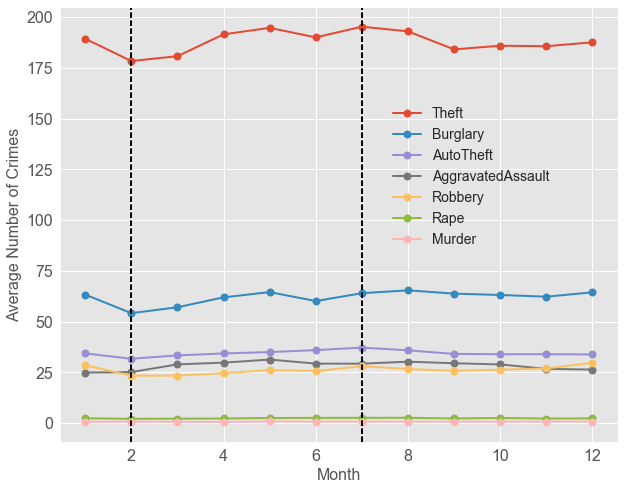

In [23]:
plt.style.use('ggplot')
# Extract the month from the index of crimes
index_month = date_crime.index.month

# Compute the mean crime for each month
crimes_by_month =date_crime.groupby(index_month).mean()#.sum(axis=1)

# Plot the mean crime rate for each month
ax = crimes_by_month.plot(figsize=(10,8),fontsize=16, linewidth=2,marker='o',markersize=8)

ax.axvline(2,color='black',linestyle='--',linewidth=2)
ax.axvline(7,color='black',linestyle='--',linewidth=2)

ax.set_xlabel('Month', fontsize=16)
ax.set_ylabel('Average Number of Crimes', fontsize=16)
ax.legend(bbox_to_anchor=(0.9, 0.8), fontsize=14);

Averaging time series values by month shows that crime rate tends to be a lot lower during February, but much higher during summer months. Perhaps during summer holidays, people travel a lot, leaving their properties vulnerable to loss. This can be further confirmed by the bar chart below where crimes are illustrated in spring, summer, fall and winter.

#### Crimes in four seasons

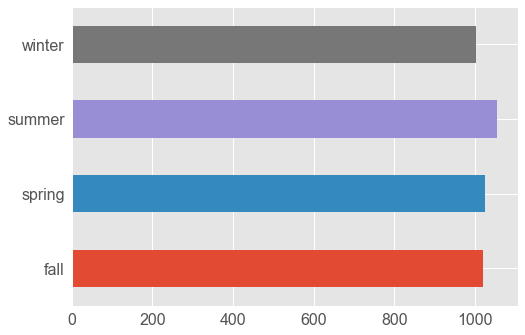

In [25]:
def season(alist):
    res=crimes_by_month.sum(axis=1)[alist].sum()
    return res


s=pd.Series({'spring':season(np.arange(3,6)),
'summer':season(np.arange(6,9)),
'fall':season(np.arange(9,12)),
'winter':season([12,1,2])})
s.plot(kind='barh',fontsize=16);

### What's the weekly crime pattern?

In [24]:
import calendar
weekday=list(calendar.day_name)#day_abbr#day_name

index_weekday = date_crime.index.weekday_name
crimes_by_weekday =date_crime.groupby(index_weekday).mean().reindex(weekday)#.sum(axis=1)

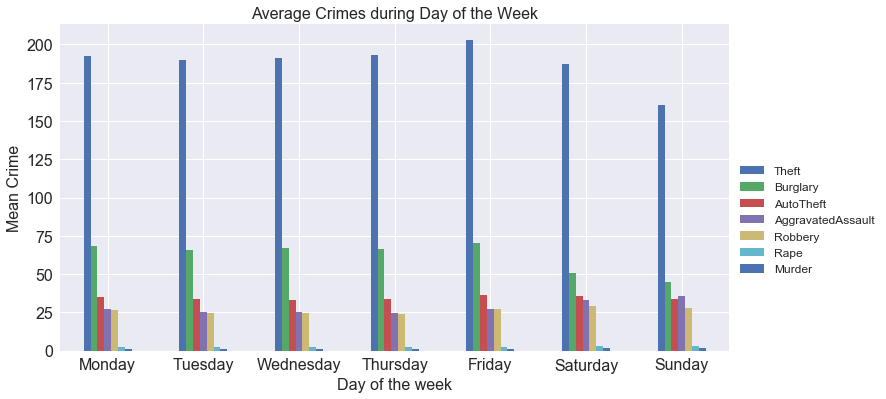

In [21]:
# Plot the mean crime rate for each month
crimes_by_weekday.plot(kind='bar',figsize=(12,6),fontsize=16,rot=0)

#ax.axvline(2,color='black',linestyle='--',linewidth=2)
#ax.axvline(7,color='black',linestyle='--',linewidth=2)

plt.xlabel('Day of the week', fontsize=16)
plt.ylabel('Mean Crime', fontsize=16)
plt.title('Average Crimes during Day of the Week', fontsize=16)
plt.legend(bbox_to_anchor=(1.0, 0.6), fontsize=12);

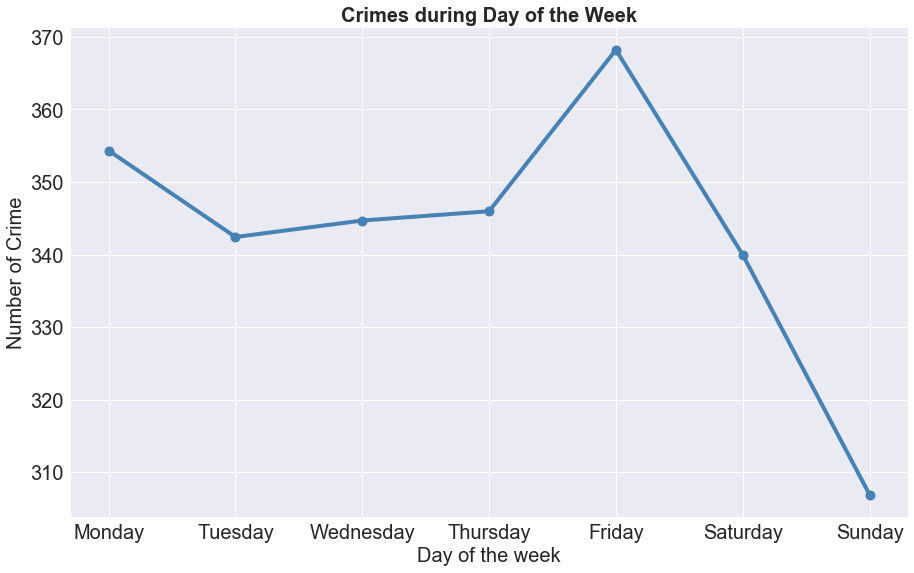

In [25]:
crimes_by_weekday.sum(axis=1).plot(figsize=(15,9),fontsize=20,marker='o',markersize=10,color='steelblue',linewidth=4)

x=np.arange(0,7)
labels=crimes_by_weekday.index
plt.xticks(x,labels)


plt.xlabel('Day of the week', fontsize=20)
plt.ylabel('Number of Crime', fontsize=20)
plt.title('Crimes during Day of the Week', fontsize=20,fontweight='bold');


The bar chart shows that Friday is the day that has most crimes while Sunday has the least crimes. It's also important to notice that while theft occured less on weekends but violent crimes like 'AggravatedAssult' has a larger possibility to happen than the other days. 

#### Crimes: weekday v.s. weekend

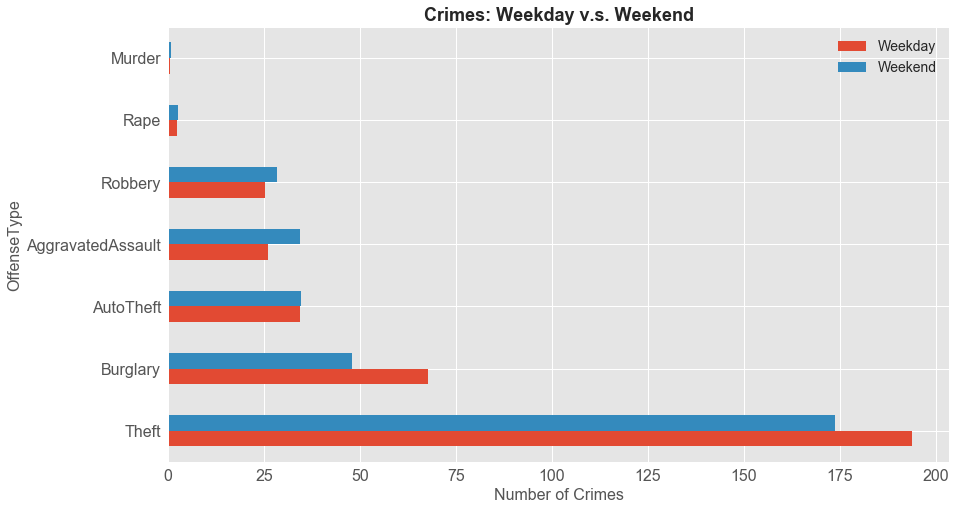

In [28]:
weekend=crimes_by_weekday.loc['Saturday':'Sunday'].mean(axis=0)
weekday=crimes_by_weekday.loc['Monday':'Friday'].mean(axis=0)
week_day_end=pd.concat([weekday,weekend],axis=1)
week_day_end.columns=['Weekday','Weekend']
week_day_end.plot(kind='barh',rot=0,figsize=(14,8),fontsize=16)
plt.xlabel('Number of Crimes',fontsize=16)
plt.ylabel('OffenseType',fontsize=16)
plt.legend(fontsize=14)
plt.title('Crimes: Weekday v.s. Weekend',fontweight='bold',fontsize=18)
plt.savefig('figs/wdayend.png');

The figure displays dominant property crimes like 'Theft', 'Burglary' are more frequent during weekdays than weekends while violent crimes like 'AggravatedAssault', 'Robbery', 'Rape', 'Murder' are more likely to occur during weekends than weekdays. An immediate follow-up question is which day has a higher crime rate on average, weekday or weekend? The bar chart below suggests that on average weekday has a higher crime rate than weekend. Is that definitely true or just by chance? We will explore more about it in inferential statistic analysis part.  

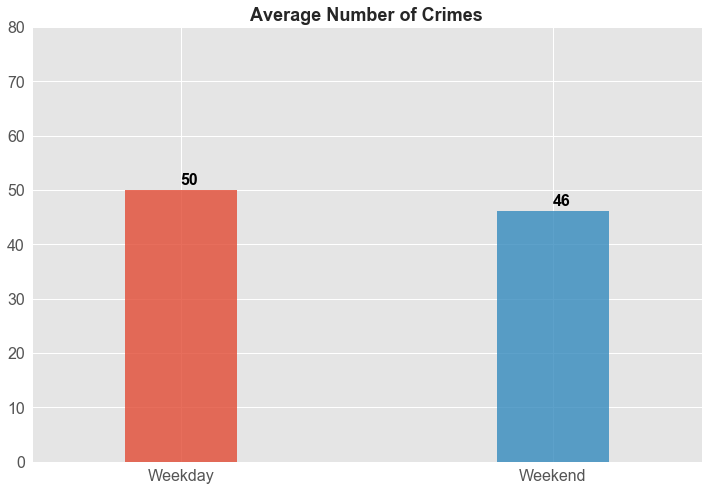

In [29]:
avg=week_day_end.mean(axis=0)
ax=avg.plot('bar',rot=0,figsize=(12,8),ylim=(0,80),width=0.3,fontsize=16,alpha=0.8)
plt.title('Average Number of Crimes',fontweight='bold',fontsize=18)

for i, v in enumerate(avg):
    ax.text( i,v + 1, int(round(v,0)), color='black', fontweight='bold',fontsize=16)


## Any Hourly Trends? Which hour has the most crimes?
In the 'Overview of data' section, a figure concerning 'Hour' shows that 3-4 am has the minimum number of crimes and crimes peak at 12 and 18 during the day. However that figure cannot display details about the time perference of different crime types.

In [30]:
#reshape the data
hour_crime=crimes.groupby(['Hour','OffenseType']).size().unstack(level='OffenseType')

#reorder columns in a decending order of count of crimes
hour_crime=hour_crime[crimes.OffenseType.value_counts().index]

hour_crime.head()

OffenseType,Theft,Burglary,AutoTheft,AggravatedAssault,Robbery,Rape,Murder
Hour,,,,,,,
0,22767,5760,4471,4683,4424,446,120
1,9924,3692,2527,4031,3511,334,111
2,8747,3972,2302,3692,3242,339,115
3,6080,4331,1715,2573,2508,285,86
4,4714,4213,1424,1636,2005,228,63


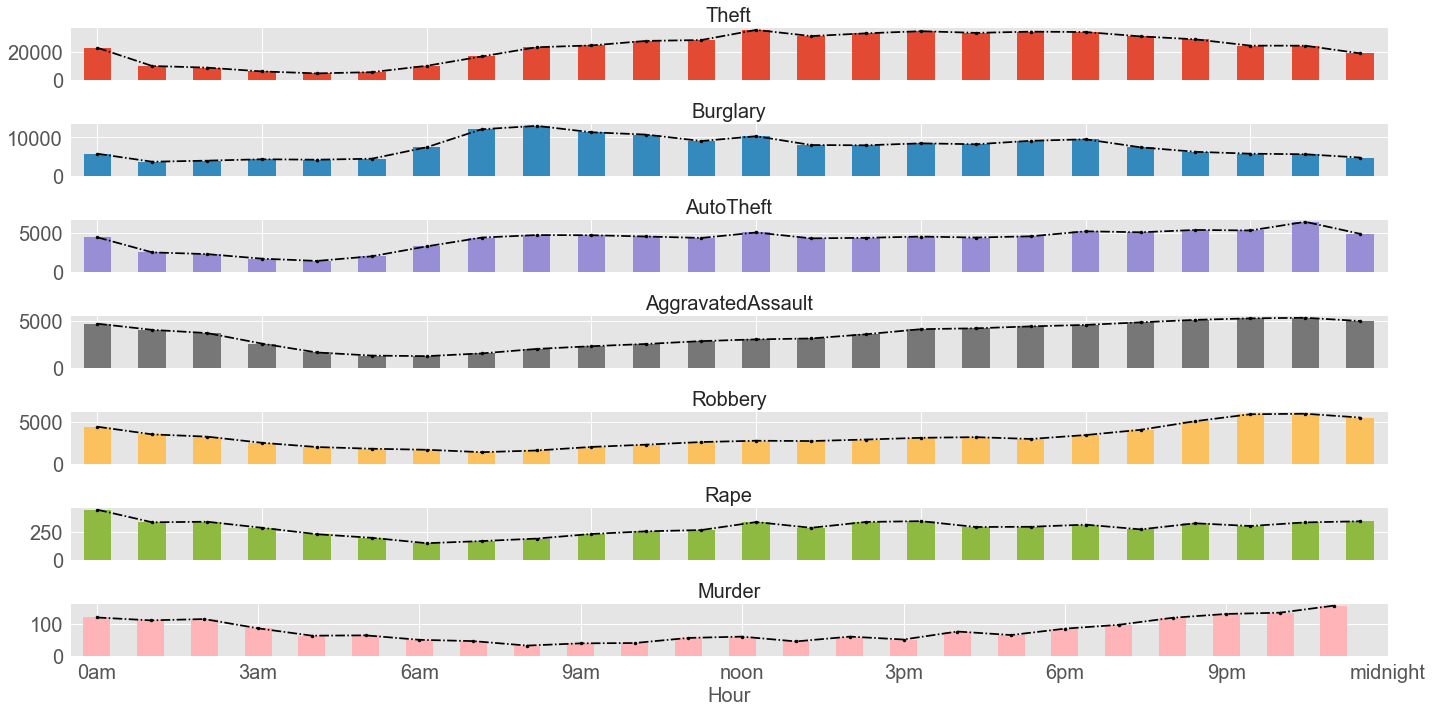

In [31]:
ax=hour_crime.plot.bar(subplots=True,legend=False,figsize=(20,10),fontsize=20,sharex=True)
[ax[i].title.set_size(20) for i in range(len(hour_crime.columns))];
hour_crime.plot(style='k.-.',subplots=True,legend=False,ax=ax)
plt.xlabel('Hour',fontsize=20)
ax[-1].set_xticks(list(np.arange(0,27,3)))
ax[-1].set_xticklabels(['0am','3am','6am','9am','noon','3pm','6pm','9pm','midnight'])
plt.tight_layout()
plt.savefig('figs/hour.png');


This figure shows that crimes like 'Theft' hits a peak in the middle of day; 'Burglary' peaks in the early morning; 'Auto theft', 'Aggravated Assault', 'Robbery', 'Murder' peaks around late or middle night; 'Rape' takes relative small porption in crimes but has a larger span of occurance during the day except the interval 4-8am. 

In [308]:
max_hour=hour_crime.idxmax()
min_hour=hour_crime.idxmin()
max_min_df=pd.DataFrame([max_hour,min_hour],index=['max_hour','min_hour'])
max_min_df

OffenseType,Theft,Burglary,AutoTheft,AggravatedAssault,Robbery,Rape,Murder
max_hour,12,8,22,22,22,0,23
min_hour,4,1,4,6,7,6,8


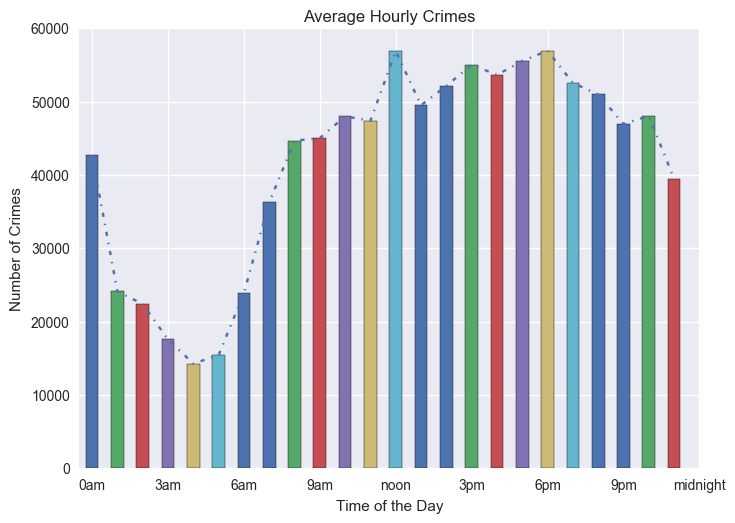

In [338]:
plt.style.use('seaborn')
ax=hour_crime.sum(axis=1).plot(kind='bar')
hour_crime.sum(axis=1).plot(style='-.',ax=ax)
ax.set_xticks(list(np.arange(0,27,3)))
ax.set_xticklabels(['0am','3am','6am','9am','noon','3pm','6pm','9pm','midnight'])
ax.set_xlabel('Time of the Day')
ax.set_ylabel('Number of Crimes')
ax.set_title('Average Hourly Crimes');



## Geographical aspects of crime patterns

## Crime patterns for different beats

In [32]:
#Reshape the crime data by counting the number of crimes on each beat
beat_crime=crimes.groupby(['Beat','OffenseType']).size().unstack().fillna(0)

#Reorder columns
#beat_crime=beat_crime[list(crimes['OffenseType'].value_counts().index)]
#beat_crime['Tot']=beat_crime.sum(axis=1)
#beat_crime.sort_values(by='Tot',ascending=False,inplace=True)
#beat_crime.drop('Tot', axis=1,inplace=True)
beat_crime.head()

OffenseType,AggravatedAssault,AutoTheft,Burglary,Murder,Rape,Robbery,Theft
Beat,,,,,,,
10H10,502.0,378.0,803.0,7.0,52.0,303.0,2014.0
10H20,306.0,276.0,673.0,7.0,26.0,193.0,1440.0
10H30,247.0,325.0,372.0,3.0,19.0,186.0,3224.0
10H40,773.0,613.0,714.0,13.0,62.0,908.0,7337.0
10H50,1569.0,534.0,1444.0,41.0,70.0,929.0,3420.0


In [268]:
len(crimes.Beat.unique())

127

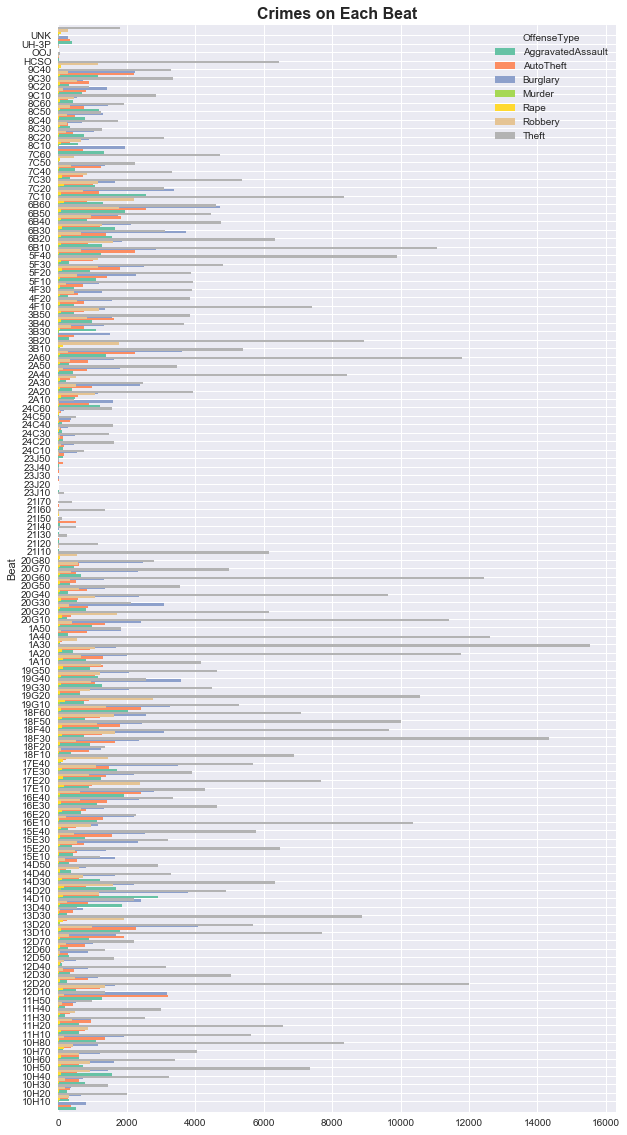

In [33]:
plt.style.use('seaborn')
beat_crime.plot(kind='barh',width=2,colormap='Set2',figsize=(10,20), fontsize=10)
plt.title('Crimes on Each Beat',fontsize=16,fontweight='bold');

The bar plot looks quite messy but it gives hints that some beats have much higher crime rates than others.

###  Top 5 High Crime Rate Beats 

In [34]:
date_beat=crimes.pivot_table(index='Date',columns='Beat',aggfunc={'OffenseType':'count'}).fillna(0)
date_beat.columns=date_beat.columns.droplevel()

date_beat_byyear=date_beat.resample('AS',label='left').sum().round(0).to_period('Y')
date_beat_byyear

Beat,10H10,10H20,10H30,10H40,10H50,10H60,10H70,10H80,11H10,11H20,...,8C50,8C60,9C10,9C20,9C30,9C40,HCSO,OOJ,UH-3P,UNK
Date,,,,,,,,,,,,,,,,,,,,,
2010,563.0,487.0,576.0,1214.0,1176.0,862.0,1303.0,900.0,1538.0,779.0,...,691.0,915.0,359.0,967.0,735.0,1688.0,0.0,0.0,0.0,221.0
2011,526.0,424.0,488.0,1363.0,1165.0,889.0,1223.0,760.0,1269.0,681.0,...,630.0,769.0,262.0,946.0,816.0,1835.0,0.0,0.0,0.0,88.0
2012,505.0,367.0,477.0,1157.0,1030.0,918.0,1349.0,900.0,1252.0,655.0,...,675.0,793.0,295.0,1040.0,762.0,1782.0,0.0,0.0,0.0,77.0
2013,465.0,372.0,463.0,1346.0,975.0,989.0,1549.0,1053.0,1191.0,687.0,...,601.0,952.0,303.0,901.0,688.0,1832.0,0.0,0.0,0.0,106.0
2014,538.0,356.0,396.0,1410.0,855.0,883.0,1457.0,908.0,1693.0,603.0,...,584.0,815.0,253.0,820.0,636.0,1608.0,68.0,41.0,2.0,413.0
2015,459.0,324.0,639.0,1298.0,875.0,961.0,1473.0,951.0,1793.0,655.0,...,523.0,905.0,264.0,781.0,684.0,1604.0,0.0,0.0,0.0,743.0
2016,521.0,264.0,655.0,1280.0,970.0,1087.0,1471.0,1068.0,1674.0,578.0,...,598.0,831.0,285.0,746.0,597.0,1500.0,0.0,0.0,3.0,852.0
2017,482.0,327.0,682.0,1352.0,961.0,1096.0,1534.0,905.0,1477.0,574.0,...,567.0,831.0,248.0,643.0,609.0,1476.0,0.0,0.0,1.0,685.0


In [36]:
beat_high=beat_crime.sum(axis=1).sort_values(ascending=False).head(5)
beat_high

Beat
19G10    21299.0
12D10    21154.0
1A20     20820.0
6B60     19984.0
13D20    19080.0
dtype: float64

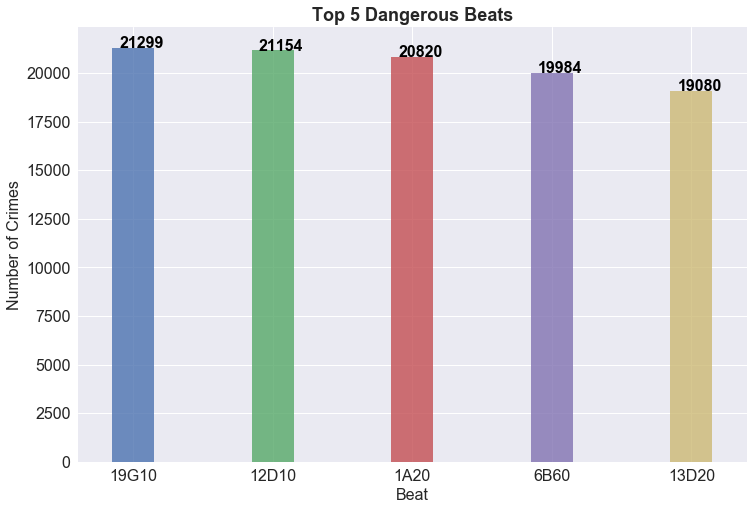

In [37]:
ax=beat_high.plot(kind='bar',rot=0,figsize=(12,8),width=0.3,fontsize=16,alpha=0.8)
plt.title('Top 5 Dangerous Beats',fontweight='bold',fontsize=18)
plt.xlabel('Beat',fontsize=16)
plt.ylabel('Number of Crimes',fontsize=16)
for i, v in enumerate(beat_high):
    ax.text( i-0.1,v + 2, int(round(v,0)), color='black', fontweight='bold',fontsize=16);
plt.savefig('figs/top5beat.png')


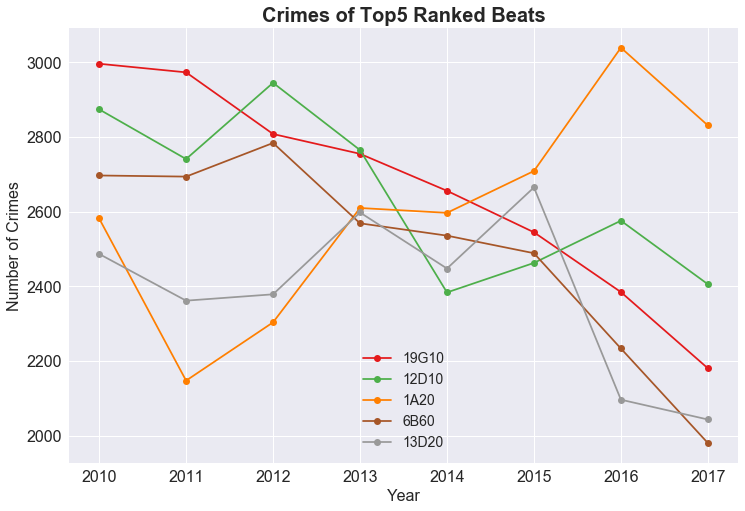

In [40]:
cols=beat_high.index.tolist()[:5]
date_beat_byyear[cols].plot(marker='o',cmap='Set1',figsize=(12,8),fontsize=16)

plt.xlabel('Year',fontsize=16)
plt.ylabel('Number of Crimes',fontsize=16)
plt.title('Crimes of Top5 Ranked Beats',fontsize=20,fontweight='bold')
plt.legend(fontsize=14);

The above figure illustrates the annual trend of the crimes happening in the Beats that ranked top 5 among all. Even though '19G10' have the most accumulated crimes but it's experiencing a decreasing trend. On the contrary, '1A20' ranked the 3rd but tends to have an increasing trend. Another interesting point is that in 2010 and 2011, '19G10' ranked first but in 2012 and 2013, beat '12D10' ranked first. Then starting from 2015, '1A20' becomes the beat with most crimes. It's interesting to find out the potential reasons for the changes in trend. Especially it's important to spot beats that have drastic increasing trend.

In [480]:
date_beat_byyear.idxmax(axis=1)

Date
2010    19G10
2011    19G10
2012    12D10
2013    12D10
2014    19G10
2015     1A20
2016     1A20
2017     1A20
Freq: A-DEC, dtype: object

### Focus on  Beat '19G10'

In [41]:
beat_19G10=crimes[crimes['Beat']=='19G10'].groupby(['Date','OffenseType']).size().unstack().fillna(0)
beat_19G10.head()

OffenseType,AggravatedAssault,AutoTheft,Burglary,Murder,Rape,Robbery,Theft
Date,,,,,,,
2010-01-01,1.0,0.0,2.0,0.0,0.0,0.0,4.0
2010-01-02,0.0,0.0,3.0,0.0,1.0,1.0,7.0
2010-01-03,1.0,2.0,2.0,0.0,0.0,1.0,3.0
2010-01-04,0.0,1.0,4.0,0.0,0.0,1.0,3.0
2010-01-05,1.0,0.0,1.0,0.0,0.0,1.0,2.0


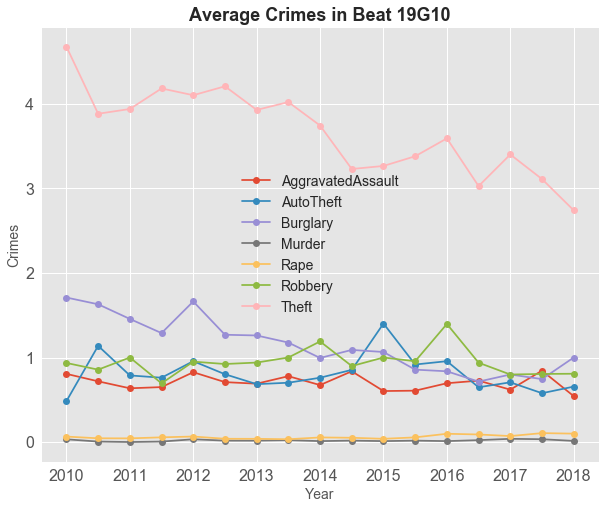

In [46]:
plt.style.use('ggplot')
beat_19G10.resample('6M').mean().plot(marker='o',figsize=(10,8),fontsize=16)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Crimes',fontsize=14)
plt.title('Average Crimes in Beat 19G10',fontsize=18,fontweight='bold')
plt.legend(loc='best',fontsize=14);

The 'Theft' in '19G10' decreased a lot starting in 2014 and so it is with 'Burglary'. That means two dominat crimes are decreased in this beat.

### Focus on  Beat '1A20'

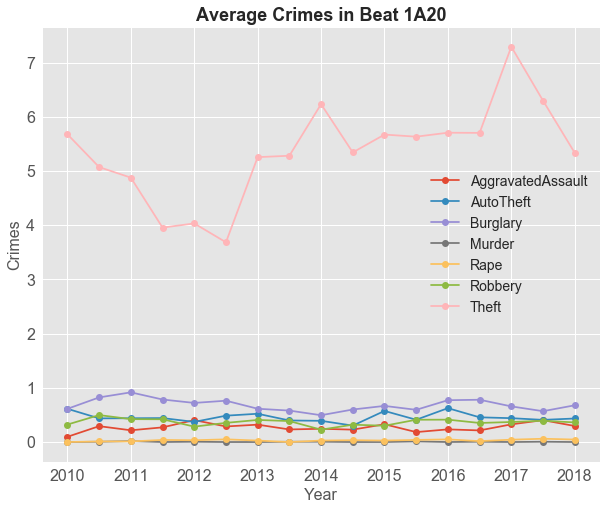

In [47]:
beat_1A20=crimes[crimes['Beat']=='1A20'].groupby(['Date','OffenseType']).size().unstack().fillna(0)
#beat_1A20.head()
plt.style.use('ggplot')
beat_1A20.resample('6M').mean().plot(marker='o',figsize=(10,8),fontsize=16)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Crimes',fontsize=16)
plt.title('Average Crimes in Beat 1A20',fontsize=18,fontweight='bold')
plt.legend(loc='best',fontsize=14);

The figure above clearly shows increasing trends in 'Theft' in beat '1A20'.

## Crime patterns for different premises

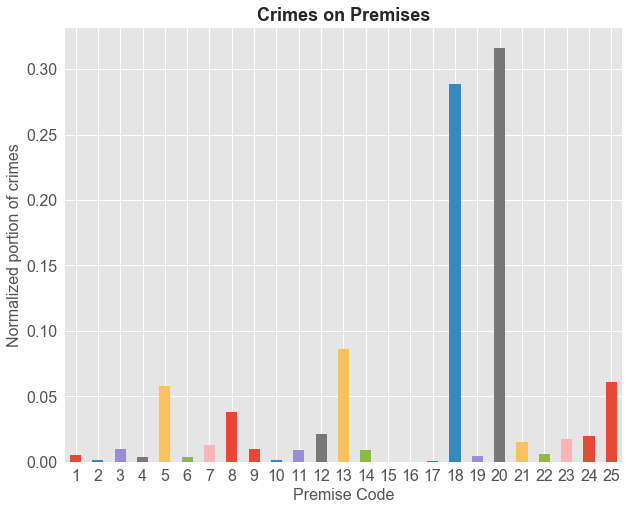

In [50]:
crimes.Premise.value_counts(normalize=True).sort_index().plot(kind='bar',rot=0,figsize=(10,8),fontsize=16)
plt.xlabel('Premise Code',size=16)
plt.ylabel('Normalized portion of crimes',size=16)
plt.title('Crimes on Premises',fontweight="bold", size=18);

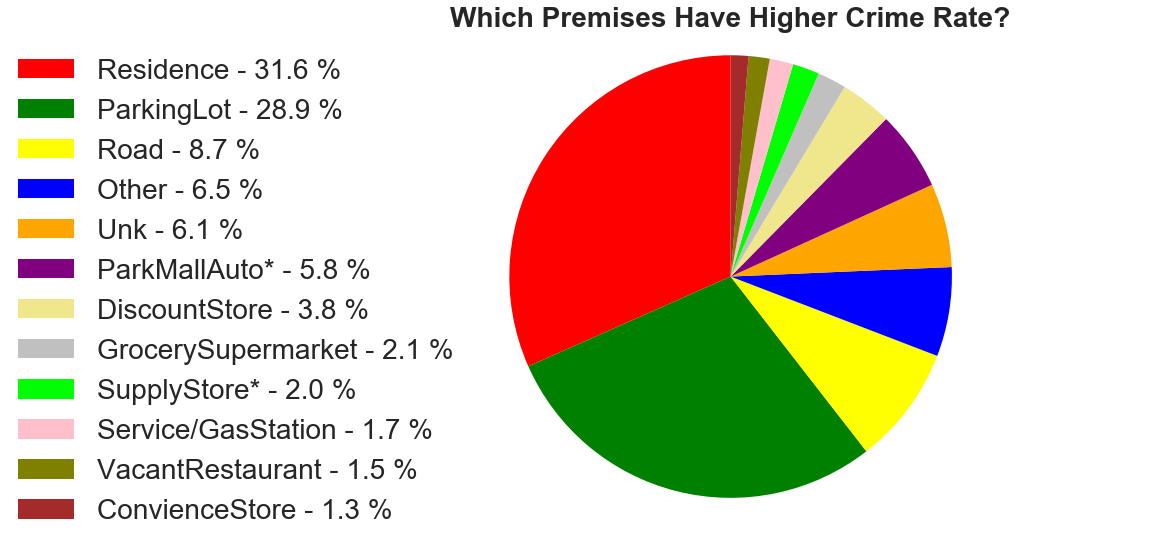

In [31]:

def pieplot(s,colors, title,fn):
    x=s.index
    y=np.array(s.values)
    percent=100.*y/y.sum()
    
    patches, texts = plt.pie(y, startangle=90, radius=1.2,colors=colors)
    labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(x, percent)]
    
    #sort_legend = True
    #if sort_legend:
    #    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),key=lambda x: x[2],reverse=True))


    plt.legend(patches, labels, loc='best', fontsize=28,bbox_to_anchor=(0.2, 1.))
    plt.title(title,fontsize=28,fontweight="bold")
    plt.axis('equal')
    #plt.savefig('figs/'+str(fn)+'.png', bbox_inches='tight',dpi=300);

colors=['red','green','yellow','blue','orange','purple','khaki','silver','lime','pink','olive','brown']


pieplot(premise_reduced,colors,'Which Premises Have Higher Crime Rate?','piechartPP')



The above figure shows that the Premise with code '20'(residential place) and '18' (parking lot) had the most frequent crimes.

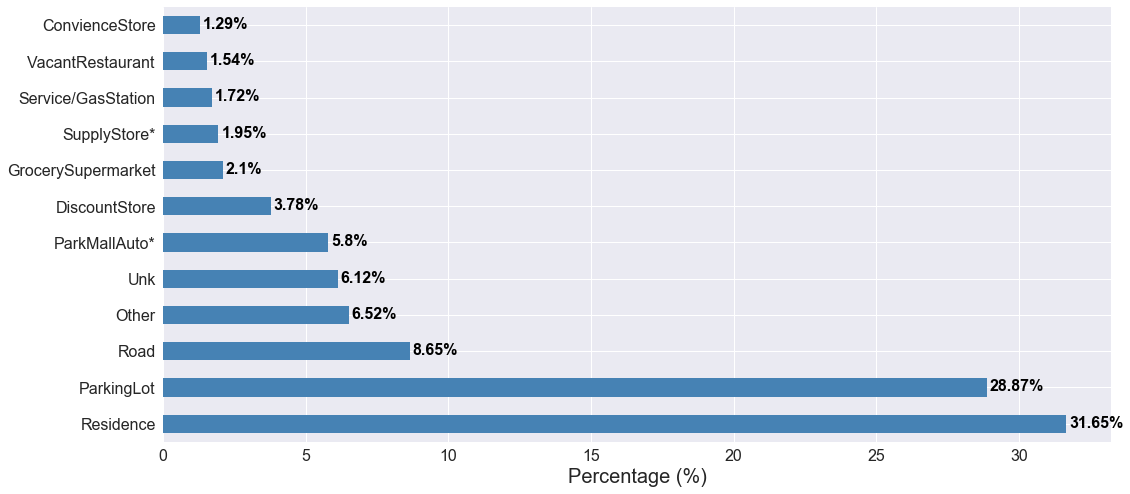

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
premise_count=crimes.Premise.value_counts(normalize=True).sort_values(ascending=False)
part=premise_count[premise_count>=0.01]
premise_reduced=part.append(pd.Series({'other': 1-np.sum(part)})).sort_values(ascending=False)
codidx=premise_reduced.index
idx=['Residence','ParkingLot','Road','Other','Unk','ParkMallAuto*','DiscountStore','GrocerySupermarket',
    'SupplyStore*','Service/GasStation','VacantRestaurant','ConvienceStore']


premise_reduced.index=idx
premise_reduced=round(premise_reduced*100,2)

#premise_reduced.to_csv('premise_red.csv',index=True,header=False)
ax=premise_reduced.plot(kind='barh',color='steelblue',figsize=(17,8),fontsize=16)


for i, v in enumerate(premise_reduced):
    ax.text( v + 0.1,i-0.1, str(v)+'%', color='black', fontweight='bold',fontsize=16);

plt.xlabel('Percentage (%)',fontsize=20)

In [27]:
premise_count=crimes.Premise.value_counts(normalize=True).sort_values(ascending=False)
part=premise_count[premise_count>=0.01]
premise_reduced=part.append(pd.Series({'other': 1-np.sum(part)})).sort_values(ascending=False)
codidx=premise_reduced.index
idx=['Residence','ParkingLot','Road','Other','Unk','ParkMallAuto*','DiscountStore','GrocerySupermarket',
    'SupplyStore*','Service/GasStation','VacantRestaurant','ConvienceStore']


premise_reduced.index=idx
premise_reduced

#list(zip(codidx,idx))

Place1=['AMUSE. PARK,BOWL. ALLEY,SKATE RINK',
           'BARBER AND BEAUTY SHOPS',
           'COMMERCIAL BUILDING, MALL COMMON AREA',
           'CAR WASH,AUTO REPAIR, VEHICLE/AUTO SALES/LEASE/AUTO PARTS STORE',
           'FACTORY/MANUFACTURING/INDUSTRIAL',
           'SPRTS,GAME ROOM',
           'LAUNDRY/DRY CLEANERS/WASHATERIAS',
           'MAINTENANCE/BUILDING SERVICES,APARTMENT/RENTAL OFFICE',
           'CHECK CASHING PLACES',
           'THEATRES,DINNER THEATERS,AUDITOR.',
           'UTILITY COMPANY,ELECTRIC,GAS,WATER',
           'WAREHOUSE']
Place2=['ADULT BOOK STORE/NEWSSTAND',
           'BOOK,RECORD,STATIONARY,OFFICE SUP.',
           'CLOTHING STORE',
           'ELECTRONICS STORE, ELECTRICAL SUP.',
           'FURNITURE, APPLIANCES, RADIOS, TV',
           'GARDEN SUPPLY, NURSERY, FLORIST',
           'JEWELRY STORES',
           'MARINE VEH. SALES,BOATS,SAILBOATS',
           'PAWN/RESALE SHOP/FLEA MARKET',
           'SPORTING GOODS/GUN SHOPS',
           'TOYS,ARTS & CRAFT,MUSICAL,BIKE,PET',
           'VIDEO RENTAL & SALES']
          

Name=pd.DataFrame(list(zip(Place1,Place2)),columns=['ParkMallAuto*','SupplyStore*'])
Name

,ParkMallAuto*,SupplyStore*
0,"AMUSE. PARK,BOWL. ALLEY,SKATE RINK",ADULT BOOK STORE/NEWSSTAND
1,BARBER AND BEAUTY SHOPS,"BOOK,RECORD,STATIONARY,OFFICE SUP."
2,"COMMERCIAL BUILDING, MALL COMMON AREA",CLOTHING STORE
3,"CAR WASH,AUTO REPAIR, VEHICLE/AUTO SALES/LEASE...","ELECTRONICS STORE, ELECTRICAL SUP."
4,FACTORY/MANUFACTURING/INDUSTRIAL,"FURNITURE, APPLIANCES, RADIOS, TV"
5,"SPRTS,GAME ROOM","GARDEN SUPPLY, NURSERY, FLORIST"
6,LAUNDRY/DRY CLEANERS/WASHATERIAS,JEWELRY STORES
7,"MAINTENANCE/BUILDING SERVICES,APARTMENT/RENTAL...","MARINE VEH. SALES,BOATS,SAILBOATS"
8,CHECK CASHING PLACES,PAWN/RESALE SHOP/FLEA MARKET
9,"THEATRES,DINNER THEATERS,AUDITOR.",SPORTING GOODS/GUN SHOPS


### What types of crimes dominate a premise?

In [56]:
premise_offense=crimes.groupby(['Premise','OffenseType']).size().unstack()
premise_offense.head()

OffenseType,AggravatedAssault,AutoTheft,Burglary,Murder,Rape,Robbery,Theft
Premise,,,,,,,
1,154.0,218.0,39.0,2.0,11.0,243.0,4810.0
2,26.0,21.0,135.0,1.0,2.0,679.0,870.0
3,2088.0,295.0,1276.0,41.0,83.0,552.0,5342.0
4,65.0,51.0,1709.0,2.0,10.0,26.0,1429.0
5,1439.0,4041.0,16787.0,39.0,147.0,2814.0,32725.0


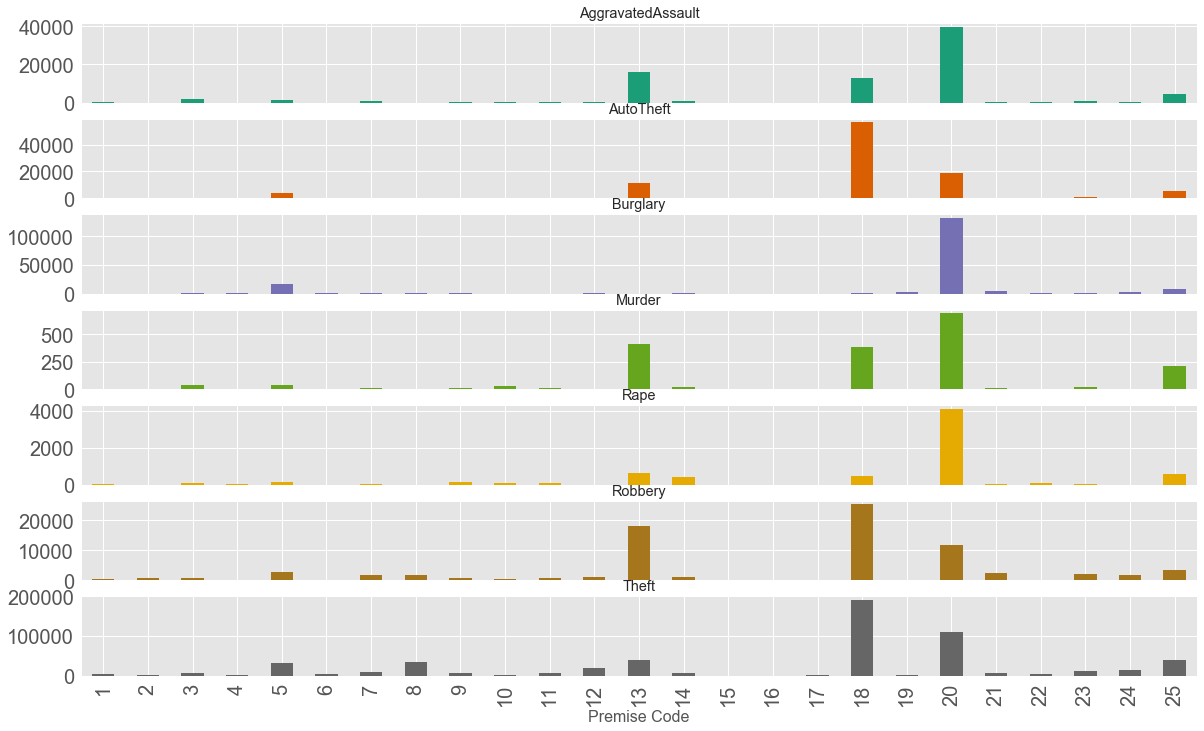

In [57]:
ax=premise_offense.plot(kind='bar',subplots=True,sharex=True,sharey=False,colormap='Dark2',figsize=(20,12),fontsize=20,legend=False,logy=False);#width=2,
plt.xlabel('Premise Code',fontsize=16);
#plt.ylabel('Number of Crimes',fontsize=16);


This figure shows that offense types is largely affected by premises. It's displayed that premises coded as 3,5,13,18,20,25 have higher versatile types of crimes. Certain premises are targets for certain crime types while others are not. 

According to HPD (http://www.houstontx.gov/police/cs/beatpages/premise.htm): codes mentioned above represent surroundings below:
3: club ('BAR/NIGHT CLUB','SEXUALLY ORIENTED CLUB')

5: public building ('AMUSE. PARK,BOWL. ALLEY,SKATE RINK','BARBER AND BEAUTY SHOPS', 'COMMERCIAL BUILDING',...)

13: road ('ALLEY', 'BUS STOP', 'CONTRA-FLOW/HOV', 'HIGHWAY/FREEWAY', 'ROAD/STREET/SIDEWALK','FREEWAY SERVICE ROAD','TOLLWAY')

18: parking lot (APARTMENT PARKING LOT, BANK/SAVING INSTITUTION PARKING LOT,...)

20: residence (APARTMENT, CONDOMINIUM, DRIVEWAY, GARAGE/CARPORT, HIGH RISE, APARTMENT LAUNDRY, MOBILE HOME,...)

25: unknow (OTHER/UNKNOWN, LIGHT RAIL PLATFORM, VACANT OTHER STRUCTURE (OUT BUILDINGS,MONUMENTS,BUILDINGS UNDER CONSTRUCTION,ETC.))

### Collapse the types of crimes
What is the distribution like if we simplify the types of crimes into violent crimes and property crimes? Will they have different behaviors?

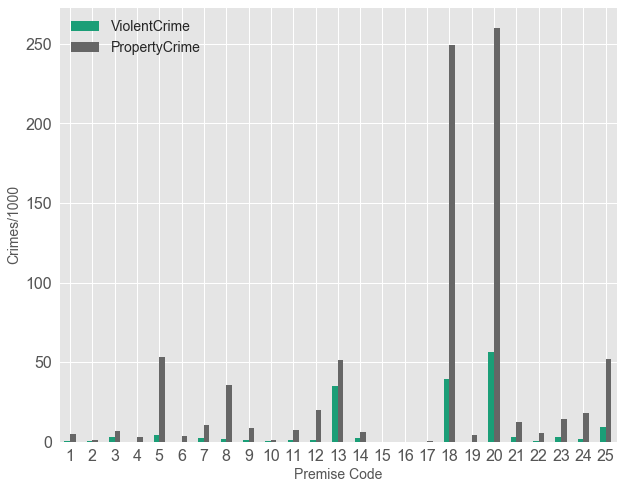

In [61]:
violentc=['AggravatedAssault','Murder','Rape','Robbery']
propertyc=['AutoTheft','Burglary','Theft']
premise_c=premise_offense.copy()
premise_c['ViolentCrime']=premise_c[violentc].sum(axis=1)
premise_c['PropertyCrime']=premise_c[propertyc].sum(axis=1)

(0.001*premise_c[['ViolentCrime','PropertyCrime']]).plot(kind='bar',subplots=False,rot=0,
                                         colormap='Dark2',figsize=(10,8),fontsize=16,legend=True,logy=False);#width=2,
plt.xlabel('Premise Code',fontsize=14)
plt.ylabel('Crimes/1000',fontsize=14)
plt.legend(fontsize=14);

In each premise, property crime is the major type.

### Focus on premise code '18' and '20': what are the dominant crime types?

In [62]:
pcode18=premise_offense.loc[18]
pcode18_reduced=pcode18[pcode18>pcode18.quantile(0.2)].append(
    pd.Series({'Other': pcode18[pcode18<=pcode18.quantile(0.2)].sum()}))


pcode20=premise_offense.loc[20]
pcode20_reduced=pcode20[pcode20>pcode20.quantile(0.2)].append(
    pd.Series({'Other': pcode20[pcode20<=pcode20.quantile(0.2)].sum()}))

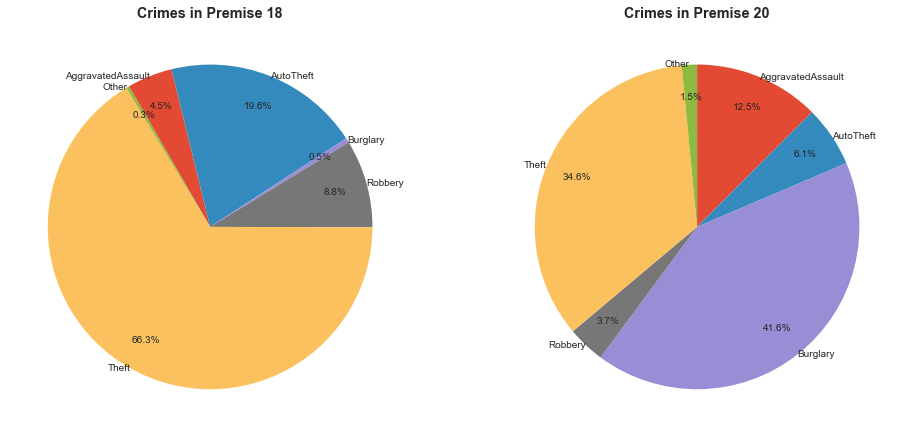

In [70]:
plt.style.use('ggplot')

fig, (ax1, ax2)= plt.subplots(1,2,subplot_kw={'aspect':'equal'},figsize=(16,8))#fig, ax = plt.subplots(figsize=(12,8))

ax1.pie(pcode18_reduced, startangle=120, shadow=False,labels=pcode18_reduced.index,
                labeldistance=1.0, autopct='%1.1f%%',pctdistance=0.8,counterclock=False)
ax1.set_title('Crimes in Premise 18',fontweight='bold')



ax2.pie(pcode20_reduced, startangle=90, shadow=False,labels=pcode20_reduced.index,
                labeldistance=1.0, autopct='%1.1f%%',pctdistance=0.8,counterclock=False)
ax2.set_title('Crimes in Premise 20',fontweight='bold')

These pie charts display that in both 18 (parking lot) and 20 (residence), 'Theft' is the most frequenty crime. Other main crimes include 'AutoTheft', 'Robbery', 'AggravatedAssault' for parking lot. Other main crimes for residence include 'Burglary', 'AggravatedAssault' and 'AutoTheft'.

### Back to beats: '19G10' and '1A20': what premises are most susceptible to crimes?

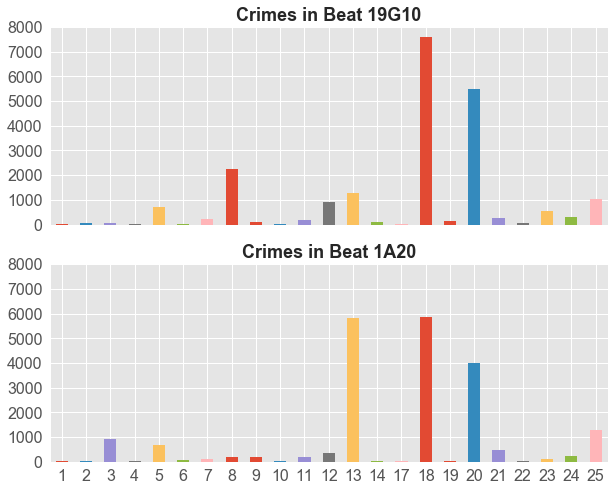

In [79]:
plt.subplot(211)
ax1=crimes[crimes['Beat']=='19G10'].Premise.value_counts().sort_index().plot(kind='bar',figsize=(10,8),fontsize=16);
ax1.set_title('Crimes in Beat 19G10',fontsize=18,fontweight='bold')
plt.ylim(0,8000);


plt.subplot(212)
ax2=crimes[crimes['Beat']=='1A20'].Premise.value_counts().sort_index().plot(kind='bar',rot=0,figsize=(10,8),fontsize=16,sharex=True)
plt.ylim(0,8000);
ax2.set_title('Crimes in Beat 1A20',fontsize=18,fontweight='bold')
plt.savefig('figs/beatpremise.png');

In beat '19G10', 3 main proportion of crims are from 18(parking lot), 20(residence),8(department/discount store).
In beat '1A20', 3 main proportion of crims are from 18(parking lot), 13(road), 20(residence).

According to HPD (http://www.houstontx.gov/police/cs/beatpages/premise.htm): codes mentioned above represent surroundings below:
3: club ('BAR/NIGHT CLUB','SEXUALLY ORIENTED CLUB')
5: public building ('AMUSE. PARK,BOWL. ALLEY,SKATE RINK','BARBER AND BEAUTY SHOPS', 'COMMERCIAL BUILDING',...)
8: DEPARTMENT/DISCOUNT STORE;
12: GROCERY/SUPERMARKET, VACANT GROCERY/SUPERMARKET
13: road ('ALLEY', 'BUS STOP', 'CONTRA-FLOW/HOV', 'HIGHWAY/FREEWAY', 'ROAD/STREET/SIDEWALK','FREEWAY SERVICE ROAD','TOLLWAY')
18: parking lot (APARTMENT PARKING LOT, BANK/SAVING INSTITUTION PARKING LOT,...)
20: residence (APARTMENT, CONDOMINIUM, DRIVEWAY, GARAGE/CARPORT, HIGH RISE, APARTMENT LAUNDRY, MOBILE HOME,...)
25: unknow (OTHER/UNKNOWN, LIGHT RAIL PLATFORM, VACANT OTHER STRUCTURE (OUT BUILDINGS,MONUMENTS,BUILDINGS UNDER CONSTRUCTION,ETC.))


## Crime patterns with respect to OffenseNum

In [214]:
num_type=crimes.groupby(['OffenseNum','OffenseType']).size().unstack().fillna(0).reset_index()
#num_type

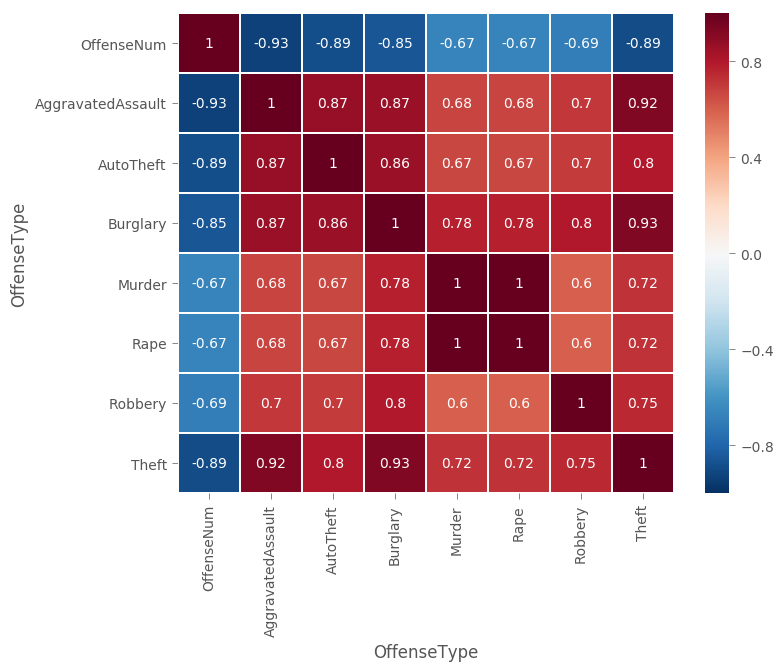

In [215]:
corr=num_type.corr(method='spearman')
sns.heatmap(corr,annot=True,linewidths=0.4,annot_kws={'size':10});

The correlation matrix shows that 'Murder' and 'Rape' might be indistinguishable if only considering 'OffenseNum'. 'Murder', 'Rape', 'Robbery' seems distinguishable from other types of crimes.

# Viualize in a  map